# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

### Cleaning Train CSV 

In [2]:
df = pd.read_csv('input/train.csv')
print(df.shape)
df.head()

(40455, 11)


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


In [3]:
# Compruebo si hay valores nulos
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
print(df.cut.unique())
print(df.color.unique())
print(df.clarity.unique())

['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
['H' 'E' 'D' 'F' 'I' 'G' 'J']
['SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2' 'IF' 'I1']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


<AxesSubplot:>

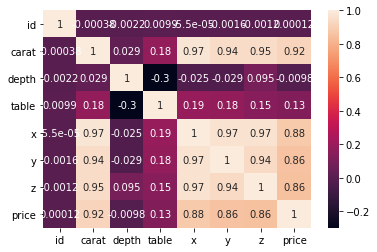

In [6]:
sns.heatmap(df.corr(), annot=True)

##### Label Encoder
Después de estudiar las características de los diamantes me doy cuenta de que las cualidades 'color', 'cut' y 'clarity' aferctan al precio, por lo que en vez de hacer label encoder decido asignarles los valores a mano en función de cómo influyen en el precio final.


In [26]:

#label = preprocessing.LabelEncoder()
#df['cut'] = label.fit_transform(df['cut'])
#df['color'] = label.fit_transform(df['color'])
#df['clarity'] = label.fit_transform(df['clarity'])
#df.info()

In [8]:
colors = {'F':1,'D':2,'E':3,'J':4,'H':5,'I':6,'G':7}
cut = {"Premium":5,"Ideal":4,"Very Good":3,"Good":2,"Fair":1}
clarity = {'VS1':1,'SI1':2,'VVS2':3,'SI2':4,'VS2':5,'IF':6,'VVS1':7,'I1':8}

In [9]:
df.color = df.color.map(colors)
df.cut = df.cut.map(cut)
df.clarity = df.clarity.map(clarity)

In [10]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.12,5,5,2,61.6,59.0,6.67,6.63,4.10,5363
1,1,1.14,3,3,4,60.0,54.0,6.74,6.97,4.11,5593
2,2,0.90,3,2,4,60.3,63.0,6.12,6.22,3.72,3534
3,3,0.71,4,3,1,61.9,54.0,5.74,5.76,3.56,3212
4,4,0.34,3,1,4,60.0,62.0,4.51,4.55,2.72,447


##### Export Clean Train CSV 

In [11]:
df.to_csv("output/train_clean.csv", header=True, index=False)

### Cleaning Test CSV 

In [12]:
predict = pd.read_csv('input/predict.csv')
print(predict.shape)
predict.head()

(13485, 10)


,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.33,Very Good,I,IF,62.0,58.0,4.44,4.46,2.76
1,1,1.21,Very Good,D,SI2,62.4,58.0,6.77,6.83,4.24
2,2,1.06,Very Good,D,SI1,59.3,60.0,6.64,6.71,3.96
3,3,0.36,Ideal,E,VVS1,61.4,57.0,4.64,4.61,2.54
4,4,0.70,Ideal,E,VS1,62.3,54.0,5.67,5.72,3.55


In [13]:
predict.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [14]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.0+ MB


##### Label Encoder
Después de estudiar las características de los diamantes me doy cuenta de que las cualidades 'color', 'cut' y 'clarity' aferctan al precio, por lo que en vez de hacer label encoder decido asignarles los valores a mano en función de cómo influyen en el precio final.

In [15]:
#label = preprocessing.LabelEncoder()
#predict['cut'] = label.fit_transform(predict['cut'])
#predict['color'] = label.fit_transform(predict['color'])
#predict['clarity'] = label.fit_transform(predict['clarity'])
#predict.info()

In [16]:
colors = {'F':1,'D':2,'E':3,'J':4,'H':5,'I':6,'G':7}
cut = {"Premium":5,"Ideal":4,"Very Good":3,"Good":2,"Fair":1}
clarity = {'VS1':1,'SI1':2,'VVS2':3,'SI2':4,'VS2':5,'IF':6,'VVS1':7,'I1':8}

In [17]:
predict.color = df.color.map(colors)
predict.cut = df.cut.map(cut)
predict.clarity = df.clarity.map(clarity)

In [18]:
predict.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.33,NaN,NaN,NaN,62.0,58.0,4.44,4.46,2.76
1,1,1.21,NaN,NaN,NaN,62.4,58.0,6.77,6.83,4.24
2,2,1.06,NaN,NaN,NaN,59.3,60.0,6.64,6.71,3.96
3,3,0.36,NaN,NaN,NaN,61.4,57.0,4.64,4.61,2.54
4,4,0.70,NaN,NaN,NaN,62.3,54.0,5.67,5.72,3.55


##### Export Clean Predict CSV

In [19]:
predict.to_csv("output/predict_clean.csv", header=True, index=False)

# Model Exploration 
Ahora que tenemos los csv con datos numéricos y sin valores nulos, vamos a explorar distintos modelos para intentar realizar la mejor predicción. Se trata de una regresión, por lo que vamos a explorar modelos de regresión.

##### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='price')
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32364, 10)
(32364,)
(8091, 10)
(8091,)


###### Training several models at once

In [21]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
models = {
    "forest" : RandomForestRegressor(),
    "bagging": BaggingRegressor(),
    "ada": AdaBoostRegressor(),
    "extraTree": ExtraTreesRegressor(),
    "histGrad": HistGradientBoostingRegressor(),
    
    "linear_reg": LinearRegression(),
    "ridge": Ridge(),
    "lasso": Lasso(),
    "ridgeCV": RidgeCV(),
    "elasticnet": ElasticNet(),
        
    "tree" : DecisionTreeRegressor(),
    "neighbors_reg": KNeighborsRegressor(),
    
    "gradient": GradientBoostingRegressor()
}

In [23]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("He acabado :) ")

Entrenando forest
Entrenando bagging
Entrenando ada
Entrenando extraTree
Entrenando histGrad
Entrenando linear_reg
Entrenando ridge
Entrenando lasso
Entrenando ridgeCV
Entrenando elasticnet
Entrenando tree
Entrenando neighbors_reg
Entrenando gradient
He acabado :) 


#####  Exploring Metrics

In [24]:
from sklearn.metrics import mean_squared_error

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print ("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

-------forest-------
RMSE 585.32
-------bagging-------
RMSE 617.56
-------ada-------
RMSE 1357.49
-------extraTree-------
RMSE 570.15
-------histGrad-------
RMSE 573.2
-------linear_reg-------
RMSE 1460.2
-------ridge-------
RMSE 1460.5
-------lasso-------
RMSE 1461.61
-------ridgeCV-------
RMSE 1463.31
-------elasticnet-------
RMSE 1922.1
-------tree-------
RMSE 788.04
-------neighbors_reg-------
RMSE 3837.6
-------gradient-------
RMSE 804.25


In [25]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10, n_jobs=-1)
    print(f"{name} accuracy {np.mean(scores)}")

forest accuracy 0.9784727500370576
bagging accuracy 0.9758659017988961
ada accuracy 0.8839862169545729
extraTree accuracy 0.9800446328028052
histGrad accuracy 0.9794426724610059
linear_reg accuracy 0.8588857443617725
ridge accuracy 0.8588918091311696
lasso accuracy 0.8591013147411927
ridgeCV accuracy 0.8588645197013207
elasticnet accuracy 0.7734964944579273
tree accuracy 0.9596164457750097
neighbors_reg accuracy -0.39742868625226396
gradient accuracy 0.9614160567753496


_____

Los tres mejores resultados son los de los siguientes modelos:
- ExtraTreesRegressor: RMSE 550.61, Accuracy 0.98109
- HistGradientBoostingRegressor: RMSE 555.12, Accuracy 0.98028
- RandomForestRegressor: RMSE 565.43, Accuracy 0.98024

Nos vamos a centrar en estos tres modelos y modificando los hiperparámetros se va a tratar de reducir su error para mejorar la predicción.